In [140]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

#dependencies for plotly
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [141]:
#file source
excel_path = "Resources/state_M2017_dl.xlsx"

#read the excel file
state17_df = pd.read_excel(excel_path, index_col=None)
state17_df.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,1922570,0.4,1000,1,...,15.77,25.01,37.83,17770,21740,32800,52020,78690,NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,69950,1,36.385,0.71,...,46.63,64.12,90.8,52130,70130,96980,133360,188860,NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,1120,6,0.585,0.4,...,94.45,#,#,84520,125290,196460,#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,27150,1.6,14.123,0.91,...,49.19,71.09,#,54040,72610,102320,147860,#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,1100,12,0.572,1.59,...,*,*,*,16310,17280,18910,24630,47510,True,NaN


In [142]:
state17_df.keys()

Index(['AREA', 'ST', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_Q', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
       'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10',
       'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [143]:
#delete some columns
state17_df = state17_df[['ST', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 
                           'TOT_EMP','EMP_PRSE', 'JOBS_1000', 'A_MEAN', 'MEAN_PRSE','A_MEDIAN']]
state17_df.head()

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,A_MEAN,MEAN_PRSE,A_MEDIAN
0,AL,Alabama,00-0000,All Occupations,total,1922570,0.4,1000,43170,0.5,32800
1,AL,Alabama,11-0000,Management Occupations,major,69950,1,36.385,111150,0.6,96980
2,AL,Alabama,11-1011,Chief Executives,detailed,1120,6,0.585,207090,3.2,196460
3,AL,Alabama,11-1021,General and Operations Managers,detailed,27150,1.6,14.123,120730,0.8,102320
4,AL,Alabama,11-1031,Legislators,detailed,1100,12,0.572,25410,4.6,18910


In [144]:
state17_df.dtypes

ST           object
STATE        object
OCC_CODE     object
OCC_TITLE    object
OCC_GROUP    object
TOT_EMP      object
EMP_PRSE     object
JOBS_1000    object
A_MEAN       object
MEAN_PRSE    object
A_MEDIAN     object
dtype: object

In [145]:
#Clean the data (#, * values)
#formate the wage colume (change to int, add $, use comma notation)
# state17_df[["A_MEAN","A_MEDIAN"]].astype(str).astype(int).map("${:.0f}".format)
# state17_df["A_MEAN"] = pd.to_numeric(state17_df["A_MEAN"])
# state17_df["A_MEAN"] = state17_df["A_MEAN"].astype(str).astype(int)

# occ_map_df["A_MEDIAN"].astype(float).map("${:.0f}".format)



#creat variables to hold the parameters for filter occupations needed
map_occ_code = "15-0000"
map_occ_tit = "Computer and Mathematical Occupations"

#filter the defined occupation catergory
occ_map_df = state17_df.loc[state17_df['OCC_CODE'] == map_occ_code, :]
occ_map_df.head()

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,A_MEAN,MEAN_PRSE,A_MEDIAN
63,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,39760,2.3,20.68,81870,1,77590
784,AK,Alaska,15-0000,Computer and Mathematical Occupations,major,5450,6.8,17.124,81820,2.3,76800
1344,AZ,Arizona,15-0000,Computer and Mathematical Occupations,major,93490,2.8,34.573,82940,1.2,79550
2100,AR,Arkansas,15-0000,Computer and Mathematical Occupations,major,23850,7.4,19.873,68360,2.5,64850
2802,CA,California,15-0000,Computer and Mathematical Occupations,major,590550,1.2,35.373,105380,0.9,100480


In [146]:
occ_map_df.to_csv("Output/occ_map_df.csv", index=False, encoding="utf-8", header=True)

In [147]:
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

In [148]:
#create text to show infor for each state on the map
occ_map_df['text'] = occ_map_df['STATE'] + '<br>' + \
'Annual Median Wage: '+ '<br>' + \
'$' + occ_map_df['A_MEDIAN'].astype(str)
occ_map_df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,A_MEAN,MEAN_PRSE,A_MEDIAN,text
63,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,39760,2.3,20.68,81870,1,77590,Alabama<br>Annual Median Wage: <br>$77590
784,AK,Alaska,15-0000,Computer and Mathematical Occupations,major,5450,6.8,17.124,81820,2.3,76800,Alaska<br>Annual Median Wage: <br>$76800
1344,AZ,Arizona,15-0000,Computer and Mathematical Occupations,major,93490,2.8,34.573,82940,1.2,79550,Arizona<br>Annual Median Wage: <br>$79550
2100,AR,Arkansas,15-0000,Computer and Mathematical Occupations,major,23850,7.4,19.873,68360,2.5,64850,Arkansas<br>Annual Median Wage: <br>$64850
2802,CA,California,15-0000,Computer and Mathematical Occupations,major,590550,1.2,35.373,105380,0.9,100480,California<br>Annual Median Wage: <br>$100480


In [149]:
#use plotly to generate heapmap for the number of employment
data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = occ_map_df['ST'],
    z = occ_map_df['TOT_EMP'].astype(float),
    locationmode = 'USA-states',
    text = occ_map_df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Number of Employment")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = f'2017 US Employment of {map_occ_tit}'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig, filename = 'Occupation_map')

In [150]:
#use plotly to generate heapmap for the annual median wage of the occupation
data_wage = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = occ_map_df['ST'],
    z = occ_map_df['A_MEDIAN'].astype(float),
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Annual Median Wage ($)")
)]

layout_wage = go.Layout(
    title = go.layout.Title(
        text = f'2017 US Employment of {map_occ_tit}'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)
fig_wage = go.Figure(data = data_wage, layout = layout_wage)
plotly.offline.iplot(fig_wage, filename = 'Occupation_map_wage')

In [169]:
#pie chart for the number of employment by major occupation

#group by occ_code and calculate the nation data (use the agg function)
aggreations = {'TOT_EMP':"sum"}
major_df = state17_df[state17_df['OCC_GROUP'] == "major"].groupby(
           ['OCC_CODE','OCC_TITLE'],as_index=False).agg(aggreations) 
            #(index=False to make CODE and TITLE columnes not index column, for pie label purpose)

major_df

,OCC_CODE,OCC_TITLE,TOT_EMP
0,11-0000,Management Occupations,7327160
1,13-0000,Business and Financial Operations Occupations,7518560
2,15-0000,Computer and Mathematical Occupations,4273060
3,17-0000,Architecture and Engineering Occupations,2531630
4,19-0000,"Life, Physical, and Social Science Occupations",1154620
5,21-0000,Community and Social Service Occupations,2113720
6,23-0000,Legal Occupations,1101380
7,25-0000,"Education, Training, and Library Occupations",8800500
8,27-0000,"Arts, Design, Entertainment, Sports, and Media...",1933340
9,29-0000,Healthcare Practitioners and Technical Occupat...,8562280


In [170]:
major_df.count()

OCC_CODE     22
OCC_TITLE    22
TOT_EMP      22
dtype: int64

<IPython.core.display.Javascript object>


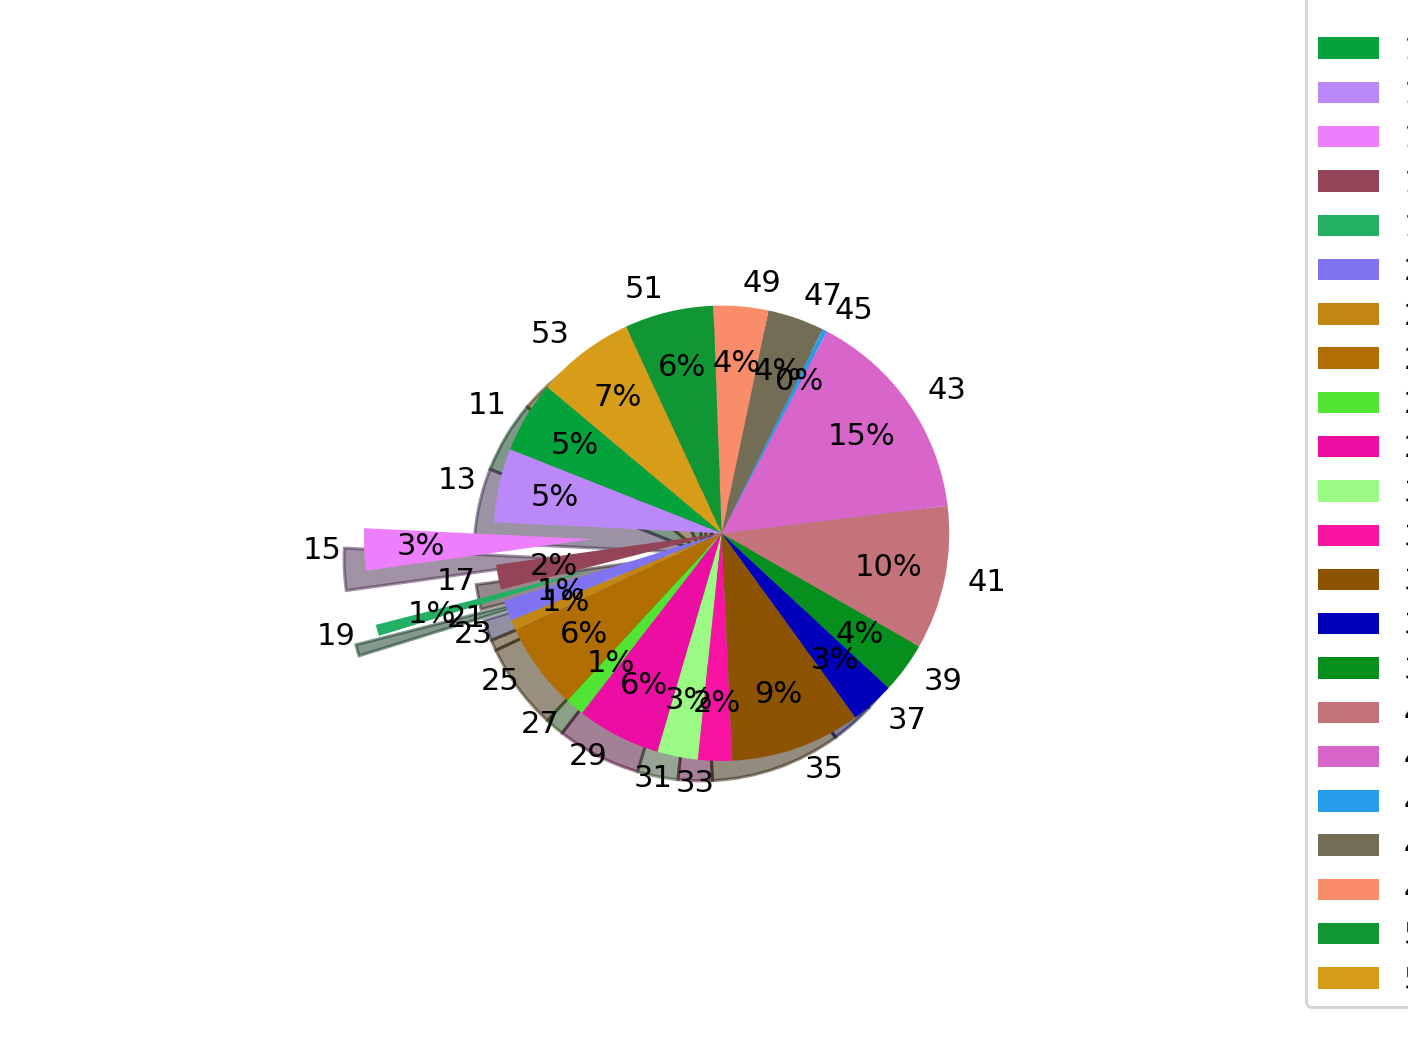

In [171]:
#pie chart for the number of employment (major catergory)

# Labels for the sections of our pie chart (cast the CODE value to string and get the first two string as job label)
labels = major_df['OCC_CODE'].astype(str).str[0:2]

# The values of each section of the pie chart
sizes = major_df['TOT_EMP']

# The colors of each section of the pie chart 
#(use random function to generate 22 random RGB colors (3 values per color) in the range [0,1])
colors = np.random.rand(22,3) 

# Tells matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.4, 0,0.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.0f%%", pctdistance=0.75,
        shadow=True, startangle=140,radius=0.7)

#.str.cat() to combine the first two occ_code (labels) with occ_tiltle
label_legend = labels.str.cat(major_df['OCC_TITLE'],sep=" ")
plt.legend(label_legend, title="Occupation Title",loc="best",bbox_to_anchor=(1.2, 0, 0.5, 1.2))
# #???why the title can not be shown
# #plt.title = "2017 US Number of Employment by Major Occupation"
# plt.show()

0                             11 Management Occupations
1      13 Business and Financial Operations Occupations
2              15 Computer and Mathematical Occupations
3           17 Architecture and Engineering Occupations
4     19 Life, Physical, and Social Science Occupations
5           21 Community and Social Service Occupations
6                                  23 Legal Occupations
7       25 Education, Training, and Library Occupations
8     27 Arts, Design, Entertainment, Sports, and Me...
9     29 Healthcare Practitioners and Technical Occu...
10                    31 Healthcare Support Occupations
11                    33 Protective Service Occupations
12    35 Food Preparation and Serving Related Occupa...
13    37 Building and Grounds Cleaning and Maintenan...
14             39 Personal Care and Service Occupations
15                     41 Sales and Related Occupations
16     43 Office and Administrative Support Occupations
17        45 Farming, Fishing, and Forestry Occu